# IM (Ianniruberto, G.and Marrucci, G.) Model
ref: Ianniruberto, G.; Marrucci, G. A simple constitutive equation for entangled polymers with chain stretch. *Journal of Rheology* __2001__, 45, 1305-1318.  
ref: Costanzo, S.; Huang, Q.; Ianniruberto, G.; Marrucci, G.; Hassager, O.; Vlassopoulos, D. Shear and Extensional Rheology of Polystyrene Melts and Solutions with the Same Number of Entanglements. *Macromolecules* __2016__, 49, 3925-3935.

## The Classical CCR Model
ref: Ianniruberto, G.; Marrucci, G. A simple constitutive equation for entangled polymers with chain stretch. *Journal of Rheology* __2001__, 45, 1305-1318.  
Define an effective time $\tau$ to replace the disengagement time $\tau_d$ in DE model:  
The classical DE model of $\mathbf{S}(t)$ is replaced to be:  

$$\begin{align}
\mathbf{S}(t) &= \int_{-\infty}^t \left[\frac{1}{\tau(t')}\right] \exp \left[-\int_{t'}^t \frac{dt''}{\tau(t'')}\right] \mathbf{Q}\left[\mathbf{E}(t,t')\right] dt' \\
\tau &= \frac{1}{2\left(\frac{1}{\tau_d}+\boldsymbol{\kappa}:\mathbf{S}\right)} +\tau_R \\
\frac{d\lambda}{dt} &= \lambda\boldsymbol{\kappa}:\mathbf{S} - \frac{\lambda F(\lambda)-1}{\tau_R} \\
F(\lambda)&=\left(\frac{\lambda_{max}^2-\frac{\lambda^2}{3}}{\lambda_{max}^2-\lambda^2}\right)\left(\frac{\lambda_{max}^2-1}{\lambda_{max}^2-\frac{1}{3}}\right) \\
\boldsymbol{\sigma} &= G_N^0F(\lambda)\lambda^2\boldsymbol{S}
\end{align}$$  

## Multimode CCR Model
ref: Costanzo, S.; Huang, Q.; Ianniruberto, G.; Marrucci, G.; Hassager, O.; Vlassopoulos, D. Shear and Extensional Rheology of Polystyrene Melts and Solutions with the Same Number of Entanglements. *Macromolecules* __2016__, 49, 3925-3935.  
$$\begin{align}
\mathbf{S}_i(t) &= \int_{-\infty}^t \left[\frac{1}{\tau_i(t')}\right] \exp \left[-\int_{t'}^t \frac{dt''}{\tau_i(t'')}\right] \mathbf{Q}\left[\mathbf{E}(t,t')\right] dt' \\
\tau_i(t) &= \frac{1}{2\left(\frac{1}{\tau_{i,eq}}+\boldsymbol{\kappa}:\mathbf{S}_i\right)} + \tau_R\\
\frac{d\lambda}{dt} &= \lambda\boldsymbol{\kappa}:\overline{\mathbf{S}} - \frac{\lambda F(\lambda)-1}{\tau_R} \\
F(\lambda)&=\left(\frac{\lambda_{max}^2-\frac{\lambda^2}{3}}{\lambda_{max}^2-\lambda^2}\right)\left(\frac{\lambda_{max}^2-1}{\lambda_{max}^2-\frac{1}{3}}\right) \\
\overline{\mathbf{S}} &= \int_{-\infty}^t \left[\frac{1}{\tau_d(t')}\right] \exp \left[-\int_{t'}^t \frac{dt''}{\tau_d(t'')}\right] \mathbf{Q}\left[\mathbf{E}(t,t')\right] dt'\\
\tau_d(t) &= \frac{\sum_iG_i\tau_i^2(t)}{\sum_i G_i\tau_i(t)}\\
\boldsymbol{\sigma} &= C_Q F(\lambda)\lambda^2\sum{G_i\boldsymbol{S}_i}
\end{align}$$  
Here,
$C_Q = 6$ if $\mathbf{Q} = \frac{\mathbf{B}^{1/2}}{\mathrm{Tr}\mathbf{B}^{1/2}}$

$$\begin{align}
\mathbf{S}(t) =& \int_{0}^t \left[\frac{1}{\tau(t')}\right] \exp \left[-\int_{t'}^t \frac{dt''}{\tau(t'')}\right] \mathbf{Q}\left[\mathbf{E}(t,t')\right] dt' \\
&+\int_{-\infty}^0 \left[\frac{1}{\tau(0)}\right] \exp \left[-\int_{t'}^t \frac{dt''}{\tau(t'')}\right] \mathbf{Q}\left[\mathbf{E}(t,0)\right] dt' 
\end{align}$$
The second parts becomes:  
$$\begin{align}
\mathbf{S}(t) =& ...\\
&+\int_{-\infty}^0 \frac{1}{\tau(0)} \exp \left[-\int_{t'}^{0} \frac{dt''}{\tau(0)}-\int_0^t\frac{dt''}{\tau(t'')}\right] \mathbf{Q}\left[\mathbf{E}(t,0)\right] dt' \\
=& ...\\
&+\int_{-\infty}^0 \frac{1}{\tau(0)} \exp \left[\frac{t'}{\tau(0)}-\int_0^t\frac{dt''}{\tau(t'')}\right] \mathbf{Q}\left[\mathbf{E}(t,0)\right] dt' \\
=& ...\\
&+ \exp \left[\frac{t'}{\tau(0)}-\int_0^t\frac{dt''}{\tau(t'')}\right] \mathbf{Q}\left[\mathbf{E}(t,0)\right] \bigg |_{t'=-\infty}^{t'=0}\\
=& ...\\
&+ \exp \left[-\int_0^t\frac{dt''}{\tau(t'')}\right] \mathbf{Q}\left[\mathbf{E}(t,0)\right]
\end{align}$$

In [15]:
import numpy as np
import scipy as sp
import pandas as pd
from matplotlib import pylab

In [16]:
#parameters for PS133k in ref: Costanzo, S. et al. Macromolecules 2016, 49, 3925-3935.
GN0 = 2.79E5
τc = 1.24E-3
τR = 0.124
λmax = 3.34
CQ = 6
Gi = np.array([1.14E2, 2.52, 8.80E-1, 3.81E-1, 2.07E-1, 1.70E-1, 1.76E-1, 1.37E-1, 2.03E-1]) * GN0
τi_eq = np.array([2.16E-3, 5.90E-2, 3.33E-1, 1.53, 6.87, 2.9E1, 1.11E2, 3.63E2, 8.92E2]) * τc

In [52]:
shear_rate = 31.6 # 1/s
κ = np.array([[0,shear_rate,0],\
              [0,0,0],\
              [0,0,0]])
δt = 0.001 # seconds
finish_time = 10 # senconds
t_span = np.arange(0,finish_time,δt)

In [18]:
def S_integral(Q_span,δt,t,τd_span):
    """
    the Q_span,τd_span were trancate in the time t
    usage: S_integral(Q_span[:ind+1,:,:],δt,τd_span[:ind+1])
    """
    #\int_t'^t dt''/taud(t'')
    τd_inv = 1/τd_span
    #exp[-\int_t'^t dt''/taud(t'')]
    exp_minus_int_tp_t_τd_inv = np.exp(-np.cumsum(τd_inv[::-1]) * δt)[::-1]
    #integral from time=0 to time t
    S00 = np.sum(τd_inv * exp_minus_int_tp_t_τd_inv * Q_span[::-1,0,0]) * δt
    S01 = np.sum(τd_inv * exp_minus_int_tp_t_τd_inv * Q_span[::-1,0,1]) * δt
    S02 = np.sum(τd_inv * exp_minus_int_tp_t_τd_inv * Q_span[::-1,0,2]) * δt
    S11 = np.sum(τd_inv * exp_minus_int_tp_t_τd_inv * Q_span[::-1,1,1]) * δt
    S12 = np.sum(τd_inv * exp_minus_int_tp_t_τd_inv * Q_span[::-1,1,2]) * δt
    S22 = np.sum(τd_inv * exp_minus_int_tp_t_τd_inv * Q_span[::-1,2,2]) * δt
    S_0_t = np.array([[S00,S01,S02],\
                    [S01,S11,S12],\
                    [S02,S12,S22]])
    #plus the integral from time = 0 to time = -infinite
    S = S_0_t + np.exp(-np.sum(1/τd_span)*δt) * Q_span[-1,:,:]
    return S

In [53]:
Q_span = np.zeros([len(t_span),3,3]) # nonlinear strain measure
S_average_span = np.zeros([len(t_span),3,3]) # orientation tensor
Si_span = np.zeros([len(τi_eq),len(t_span),3,3]) # orientation tensor
τi_span = np.zeros([len(τi_eq),len(t_span)]) # tau_i
τd_span = np.zeros(len(t_span)) # tau_d
λ_span = np.zeros(len(t_span)) # λ
σ_span = np.zeros([len(t_span),3,3]) # σ stress
τi_t = np.zeros_like(τi_eq) #τi at time t
for ind,t in enumerate(t_span):
    #initial the value at time = 0s 
    if ind == 0:
        Q_span[0,:,:] = np.eye(3)/3
        S_average_span[0,:,:] = np.eye(3)/3
        for i in np.arange(len(τi_eq)):
            Si_span[i,0,:,:] = np.eye(3)/3
            if τi_eq[i] > τR:
                τi_span[i,0] = τi_eq[i]/2  + τR
            else:
                τi_span[i,0] = τi_eq[i]/2
        τd_span[0] = np.sum(Gi * τi_span[:,0]**2)/np.sum(Gi * τi_span[:,0])
        λ_span[0] = 1
        for i in np.arange(len(τi_eq)):
            σ_span[0,:,:] += CQ * Gi[i] * Si_span[i,0,:,:]
        continue
    
    #calculate the Q at time t.
    γ_history = t * shear_rate
    E = np.eye(3)
    E[0,1] = γ_history
    B = np.dot(E,E.T)
    eigs, eig_vec = np.linalg.eig(B)
    B_square_root = np.dot(eig_vec,np.dot(np.diag(np.sqrt(eigs)),eig_vec.T))
    Q_span[ind,:,:] = B_square_root/np.trace(B_square_root)
    
    #calculate the τi(t)
    for i in np.arange(len(τi_eq)):
        #Si at time t
        Si_t = Si_span[i,ind-1,:,:]
        if τi_eq[i] > τR:
            τi_t[i] = 1/2/(1/τi_eq[i] + np.trace(np.dot(κ,Si_t))) + τR
        else:
            τi_t[i] = 1/2/(1/τi_eq[i] + np.trace(np.dot(κ,Si_t)))
        #Si at time t update
        Si_t_update = S_integral(Q_span[:ind,:,:],δt,t,τi_span[i,:ind])
        Si_span[i,ind,:,:] = Si_t_update
    τi_span[:,ind] = τi_t
    #τd = \sum Giτi^2 / (\sum Giτi)
    τd_span[ind] = np.sum(Gi * τi_span[:,ind]**2)/np.sum(Gi * τi_span[:,ind])
    #S_average at time t
    S_average_t_update = S_integral(Q_span[:ind,:,:],δt,t,τd_span[:ind])
    S_average_span[ind,:,:] = S_average_t_update
    
    #calculate the dλ_dt
    λ = λ_span[ind-1]
    Fλ = (λmax**2 - λ**2/3)/(λmax**2 - λ**2)*(λmax**2 - 1)/(λmax**2 - 1/3)
    dλ_dt = λ * np.trace(np.dot(κ,S_average_t_update)) - (λ * Fλ - 1) / τR
    λ_update = λ + dλ_dt * δt
    λ_span[ind] = λ_update
    Fλ_update = (λmax**2 - λ_update**2/3)/(λmax**2 - λ_update**2)*(λmax**2 - 1)/(λmax**2 - 1/3)
    σ_update = np.zeros([3,3])
    for i in np.arange(len(τi_eq)):
        σ_update += CQ * Fλ_update * λ_update**2 * Gi[i] * Si_span[i,ind,:,:]
    σ_span[ind] = σ_update

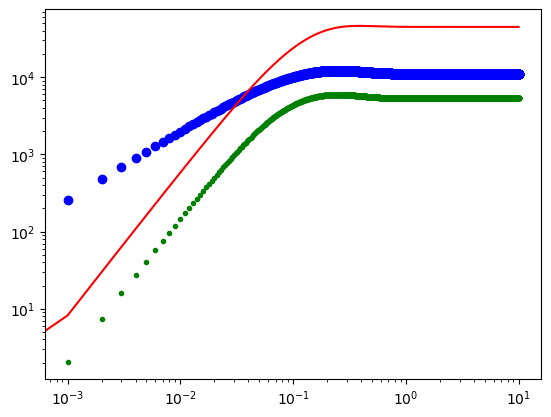

In [54]:
pylab.loglog(t_span-δt,σ_span[:,0,1]/shear_rate,'bo')
pylab.loglog(t_span-δt,(σ_span[:,0,0]-σ_span[:,1,1])/shear_rate,'r-')
pylab.loglog(t_span-δt,(σ_span[:,2,2]-σ_span[:,1,1])/shear_rate,'g.')

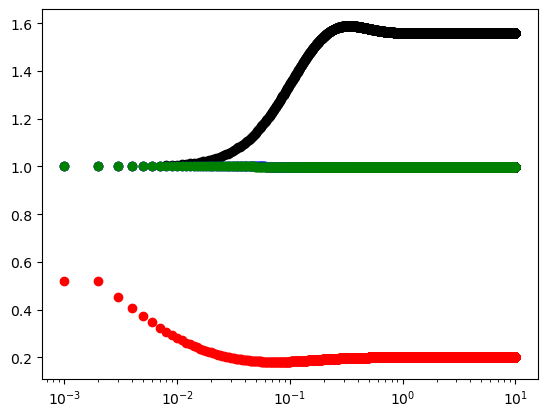

In [61]:
pylab.semilogx(t_span,τd_span,'ro')
pylab.semilogx(t_span,λ_span,'ko')
pylab.semilogx(t_span,np.trace(Si_span[8,:,:,:],axis1=1,axis2=2),'bo')
pylab.semilogx(t_span,np.trace(S_average_span,axis1=1,axis2=2),'go')

## Approximation of nonlinear strain measure $\mathbf{Q}\left[\mathbf{E}(t,t')\right]$
1. A highly accurate approximation for this strain measure is:  
ref: chapter 11.3 of Dealy, J. M. Larson, R. G. Read, D. J. "Structure and rheology of molten polymers, from structure to flow behavior and back again." __2018__, Carl Hanser Verlag GmbH Co KG.
$$\mathbf{Q} \approx  \left(\frac{5}{J-1}\right)\mathbf{B} - \left[\frac{5}{(J-1)(I_2+13/4)^{1/2}}\right]\mathbf{C}$$here:  
$$J\equiv I_1+2(I_2+13/4)^{1/2}$$
$$I_1\equiv \mathrm{Tr}(\mathbf{B})$$
$$I_2\equiv \mathrm{Tr}(\mathbf{C})$$
$\mathbf{B}$ is the Finger tensor, and $\mathbf{C}$ is the Cauchy tensor.  
2. Marrucci et al. proposed another approximation of this strain measure, which gives a much improved prediction of the normal stress ratio in shear, namely $-N_2/N_1=1/4$ in the limit of small strains, as compared to Doi-Edwards value of 1/7. ref: Milner, S. T. Improved model of nonaffine strain measure. *Journal of Rheology* __2001__, 45, 1023-1028.
$$
\mathbf{Q}(\mathbf{E})=\frac{\mathbf{C}^{-1/2}}{\mathrm{Tr}(\mathbf{C^{-1/2}})}
$$
here:
$\mathbf{C}^{-1}=\mathbf{E}\cdot\mathbf{E}^T$ is the finger tensor. $\mathbf{E}$ is the inverse of displacement gradient tensor.


## Finger Tensor $\mathbf{B}$ and Cauchy Tensor $\mathbf{C}$
#### For simple shear:  
$$\mathbf{F} (t_0,t_1)=\begin{pmatrix}
 1 & \gamma (t_1)-\gamma (t_0) & 0\\
 0 & 1 & 0\\
 0 & 0 &1
\end{pmatrix}$$
$$\mathbf{E} (t_0,t_1)=\begin{pmatrix}
 1 & \gamma (t_0)-\gamma (t_1) & 0\\
 0 & 1 & 0\\
 0 & 0 &1
\end{pmatrix}$$  
The Cauchy Tensor, also known as right Cauchy–Green deformation tensor, $\mathbf{C}$:  
$$
\begin{align}
\mathbf{C} &= \mathbf{F}^T\cdot\mathbf{F} \\
&=\begin{pmatrix}
 1 & \gamma & 0\\
 \gamma & 1+\gamma^2 & 0\\
 0 & 0 &1
\end{pmatrix}
\end{align}
$$
The Finger Tensor, also known as left Cauchy–Green deformation tensor, $\mathbf{B}$:  
$$\begin{align}
\mathbf{B} &= \mathbf{F}\cdot\mathbf{F}^{T} \\
&=\begin{pmatrix}
 1+\gamma^2 & \gamma & 0\\
 \gamma & 1 & 0\\
 0 & 0 &1
\end{pmatrix}
\end{align}$$
Sometimes, Finger strain tensor is also defined by inverse of Cauchy tensor as (ref: Milner, S. T. *Journal of Rheology* __2001__, 45, 1023-1028.):  
$$
\mathbf{B} = \mathbf{C}^{-1} = \mathbf{E}\cdot\mathbf{E}^T = \begin{pmatrix}
 1+\gamma^2 & -\gamma & 0\\
 -\gamma & 1 & 0\\
 0 & 0 &1
\end{pmatrix}
$$
Here, the diagonal is the same, while the $B_{0,1}, B_{0,2}, B_{1,2}$ parts are negative.  